## This script is to build the input for the lake Difenbaker on Gardiner Dam

### The aim is to network topology and also the input files for this case

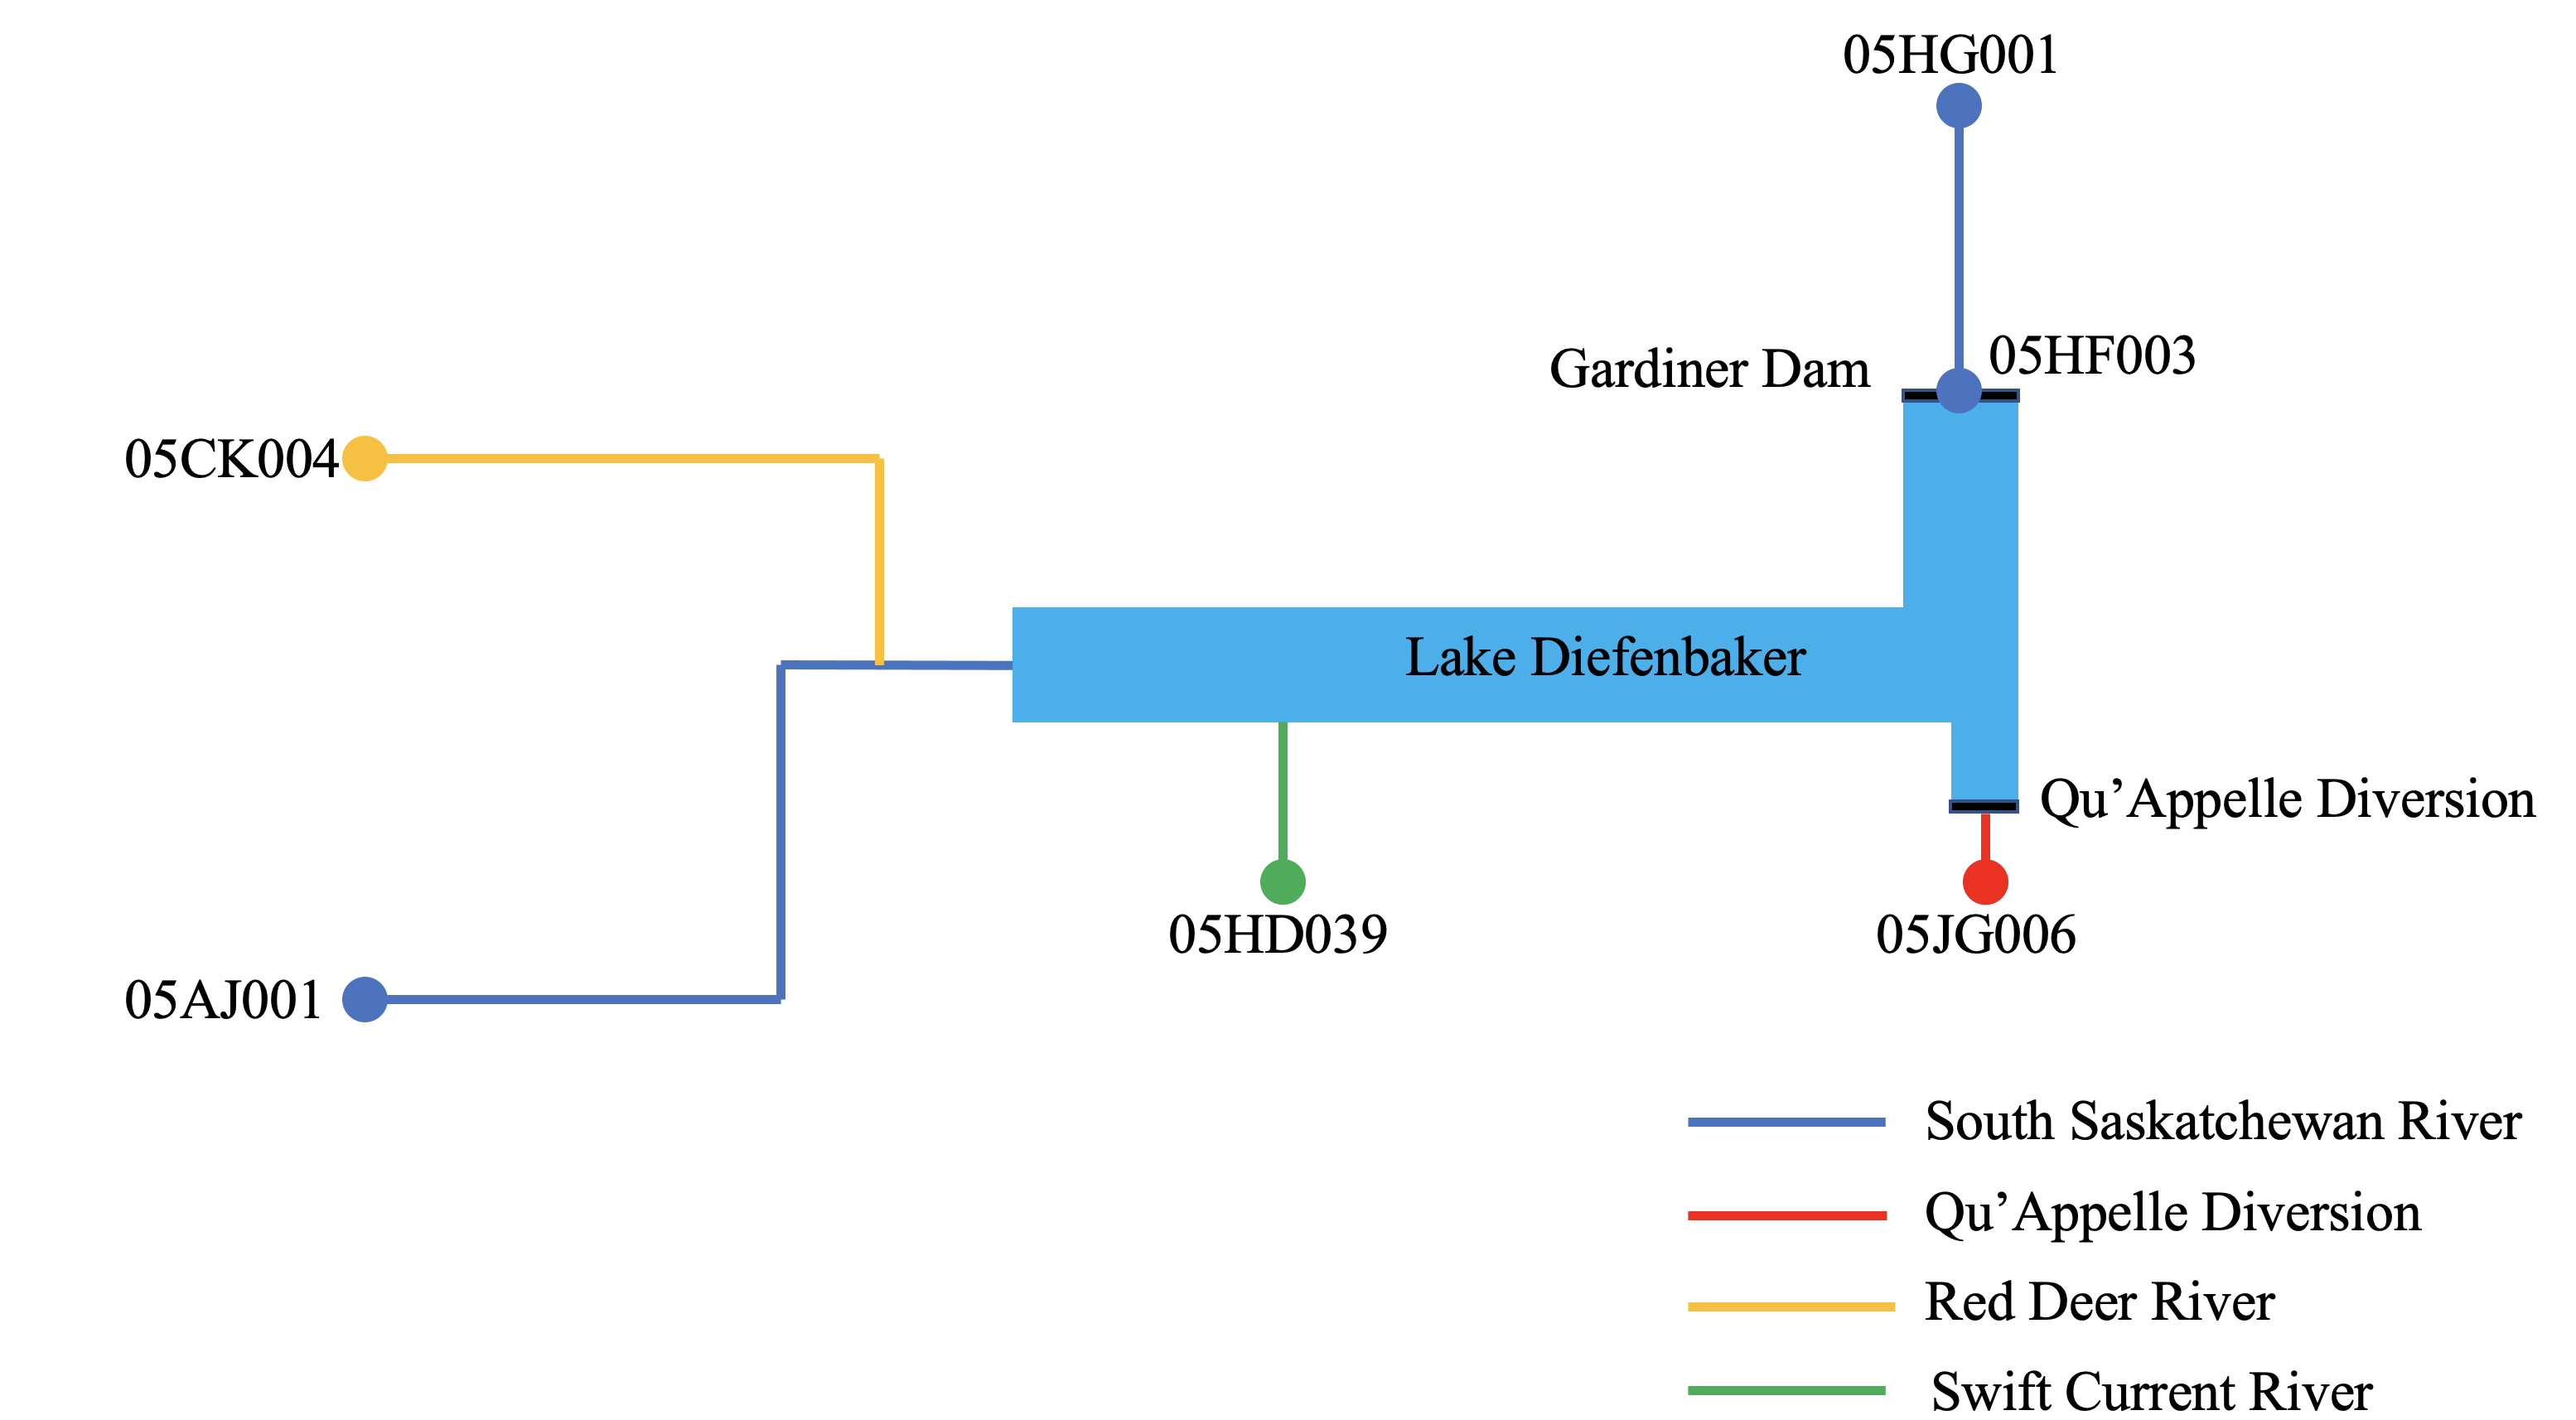


-------
### Creating of the stramflow data at the gauges upstream and downstream


| Gauge name | Gauge ID |
| --- | --- | 
| SWIFT CURRENT CREEK NEAR LEINAN | 05HD039  |
| ELBOW DIVERSION CANAL AT DROP STRUCTURE | 05JG006  |
| SOUTH SASKATCHEWAN RIVER AT SASKATOON | 05HG001  |
| RED DEER RIVER NEAR BINDLOSS | 05CK004  |
| SOUTH SASKATCHEWAN RIVER AT MEDICINE HAT | 05AJ001  |

Three of the upstream gauges are included as injection varibale with positiv, 05JG006 is treated as abstraction with negative values.


[470, 243, 723, 800]
<xarray.Dataset>
Dimensions:          (time: 40, n: 4)
Coordinates:
  * time             (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-07-10
    lat              (n) float64 ...
    lon              (n) float64 ...
    Station_ID       (n) object ...
Dimensions without coordinates: n
Data variables:
    Flow             (n, time) float64 ...
    flags            (n, time) |S1 ...
    DrainageAreaEff  (n) float64 ...
    DrainageArea     (n) float64 ...
    Station_Name     (n) object ...
    ID               (n) int32 ...
Attributes:
    Conventions:  CF-1.6
    License:      The file is created by Shervan Gharari, under MIT, https://...
    history:      Created Fri Jul 12 22:04:01 2019
    source:       described 1418 gauges stating with code 05 of WSC HYDAT data
<xarray.Dataset>
Dimensions:      (time: 40, n: 16)
Coordinates:
  * time         (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-07-10
Dimensions without coordinates: n
Data variables:
    a

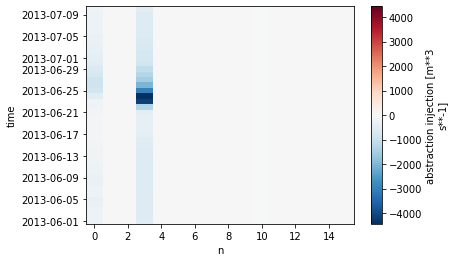

In [3]:
# load the packages
import xarray as xr
import pandas as pd
import numpy  as np
from ipynb.fs.full.Untitled2 import save_netcdf
import os
import shutil

# station list
station_list = ["05CK004","05AJ001","05HD039","05JG006"] # coresponsing with 1, 4, 11, 13 segment of network topology

# load the file that include the data
ds = xr.open_dataset('/Users/shg096/Desktop/HYDAT_05.nc') # direction to HYDAT_05 point
ds = ds.sel(time=slice('2013-06-01','2013-07-10'))
station_all = list (np.array(ds.Station_ID[:]))

# subseting the netcdf file
idx = [station_all.index(i) for i in station_list]
print(idx)
ds_subset = ds.isel(n=idx)

print (ds_subset)

## creating the water management injection/abstration data frame
dates = pd.date_range('2013-06-01','2013-07-10', freq='d')
df = pd.DataFrame(index=dates, data={'R1': 0})

# populate the colomn equal to the number of the object on network topology (16)
for i in np.arange(16):
    string = 'R'+str(i+1)
    df [string] = 0

# add some varibales
df ['R1'] = ds_subset.Flow[0,:] * -1# red deer at bindloss,
df ['R4'] = ds_subset.Flow[1,:] * -1# south saskatchewan at medicine hat
df ['R11'] = ds_subset.Flow[2,:] * -1# swift current
df ['R13'] = ds_subset.Flow[3,:] #* -1 # abstraetion from the lake defenbaker to QuAppelle

# save as pdf
path = '../data/abs_inj/'
if os.path.isdir(path):
    shutil.rmtree(path)
os.mkdir(path)
df.to_csv(path+'abs_inj.csv')

# save as netcdf
df = pd.read_csv(path+'abs_inj.csv')
df.rename(columns = {'Unnamed: 0':'Dates'}, inplace = True)
save_netcdf(df,
            'Dates',
            path+'abs_inj.nc',
            'abs_inj',
            'm**3 s**-1',
            'abstraction injection',
            time_step = 'seconds', # minutes, hours, or days
            calendar = 'standard',
            ID  = None, # array of int values; numpy array
            lat = None, # array of lat values; numpy array
            lon = None, # array of lon values; numpy array
            author_name = ' ',
            case_name = ' ',
            license = ' ')

ds = xr.open_dataset(path+'abs_inj.nc')
print(ds)
ds.abs_inj.plot()


------------------
## Creating the input runoff, evaporation and precipitation filed (all zeros)

<xarray.Dataset>
Dimensions:        (time: 40, n: 16)
Coordinates:
  * time           (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-07-10
Dimensions without coordinates: n
Data variables:
    Precipitation  (time, n) float64 ...
    column_name    (n) object ...
    ID             (n) int32 ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by  
    License:       
    History:      Created Fri Oct 29 19:52:26 2021
    Source:       Case:  ; remapped by script from library of Shervan Gharari...


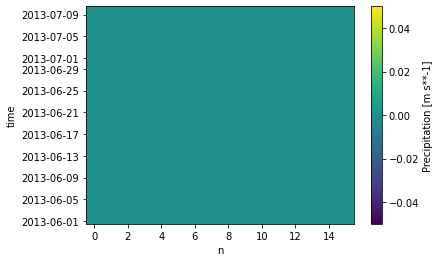

In [4]:
# creating the water management injection/abstration data frame
dates = pd.date_range('2013-06-01','2013-07-10', freq='d')
df = pd.DataFrame(index=dates, data={'R1': 0})

# populate the colomn equal to the number of the object on network topology (16)
for i in np.arange(16):
    string = 'R'+str(i+1)
    df [string] = 0
    
path = '../data/forcing/'
if os.path.isdir(path):
    shutil.rmtree(path)
os.mkdir(path)
df.to_csv(path+'forcing.csv')

# save as netcdf
df = pd.read_csv(path+'forcing.csv')
df.rename(columns = {'Unnamed: 0':'Dates'}, inplace = True)
save_netcdf(df,
            'Dates',
            path+'forcing.nc',
            'Runoff',
            'm s**-1',
            'Precipitation',
            time_step = 'seconds', # minutes, hours, or days
            calendar = 'standard',
            ID  = None, # array of int values; numpy array
            lat = None, # array of lat values; numpy array
            lon = None, # array of lon values; numpy array
            author_name = ' ',
            case_name = ' ',
            license = ' ')

ds = xr.open_dataset(path+'forcing.nc')
print(ds)
ds.Precipitation.plot()
